# ESTUDIO DE CODIGO DE RED 

# PUERTAS Y VIDRIOS DE MATAMOROS (FYPON PLANTA 2)

#### START TIME: 22/NOV/23
#### END TIME: 29/NOV/23

# El presente formato esta adaptado de acuerdo a lo que pide el plan de trabajo del Codigo de Red 2022 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [2]:
xslx = pd.ExcelFile("CDR_FYPON23.xlsx")

pf= pd.read_excel(xslx, "pf")
unb= pd.read_excel(xslx, "unb")
harm= pd.read_excel(xslx, "harm")
pst1= pd.read_excel(xslx, "pst")
plt1= pd.read_excel(xslx, "plt")
i1= pd.read_excel(xslx, "c1")


In [3]:
pf.head()

,Fecha,TPF
0,2023-11-22 14:00:00,0.964529
1,2023-11-22 14:05:00,0.963714
2,2023-11-22 14:10:00,0.965127
3,2023-11-22 14:15:00,0.964744
4,2023-11-22 14:20:00,0.975495


In [2]:
#pf2.head()

In [3]:
#unb.head()

In [4]:
#i1.head()

# 3.4 Factor de Potencia

## Evaluacion de factor de potencia ( 5 min )

In [4]:
tpf= pf['TPF']

tpf.describe(percentiles=[0.05, 0.95, 0.99])

count    2017.000000
mean        0.980213
std         0.015059
min         0.935854
5%          0.953815
50%         0.982629
95%         0.998949
99%         0.999770
max         0.999994
Name: TPF, dtype: float64

In [5]:
pf_ev= pf['TPF']

pf_ev.value_counts(bins=[0,0.95,1], normalize=True).mul(100).round(1).astype(str) + '%'

(0.95, 1.0]       96.4%
(-0.001, 0.95]     3.6%
Name: TPF, dtype: object

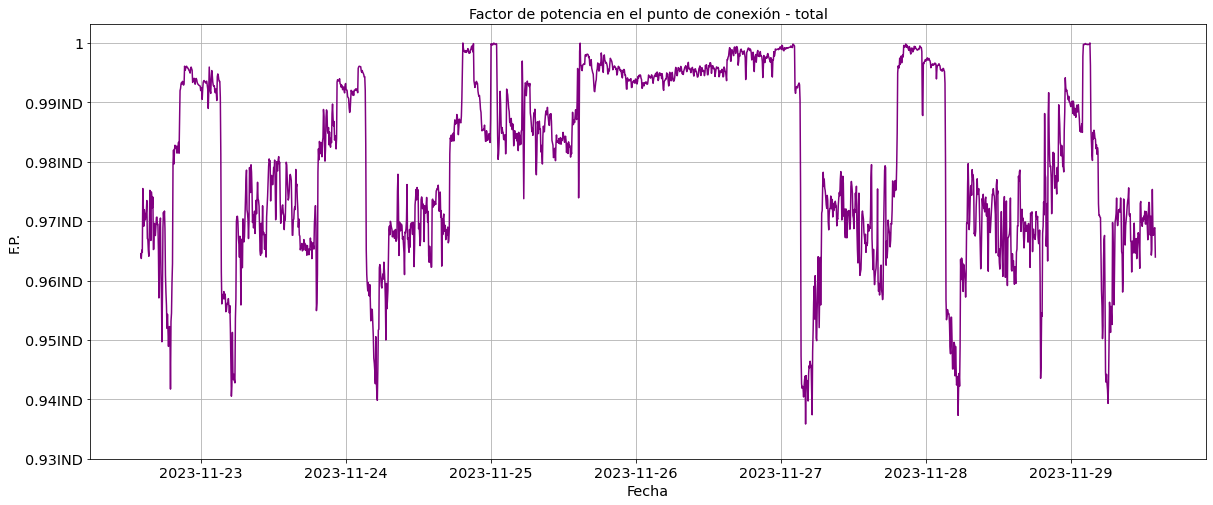

In [26]:
x1= pf['Fecha']

# Obtiene la información de la segunda columna del Excel
second_col = pf.iloc[:, 1].copy()  # Usa el método copy() para obtener una copia del DataFrame

# Itera a través de los valores de la columna
for i in range(len(second_col)):
    # Revisa si el valor es positivo
    if second_col[i] > 0:
        # Si el valor es positivo, se le resta a 2
        second_col[i] = 2 - second_col[i]
    # Revisa si el valor es negativo
    elif second_col[i] < 0:
        # Multiplica el valor por -1 para hacerlo positivo
        second_col[i] *= -1

# Actualiza la segunda columna de datos en el DataFrame original
pf.iloc[:, 1] = second_col


plt.figure(figsize=(20,8))
plt.plot(x1, pf.iloc[:, 1], color='purple', label='FP')

plt.title('Factor de potencia en el punto de conexión - total')
plt.xlabel('Fecha')
plt.ylabel('F.P.')

# Configurar el eje "y" en casos donde el FP no baje de 0.9 en IND y CAP
plt.yticks([ 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1],
          [ '0.93IND', '0.94IND', '0.95IND', '0.96IND', '0.97IND', '0.98IND', '0.99IND', '1'])


    
plt.grid()
plt.show()

# 3.8 Calidad de la potencia

## Evaluacion de desbalance (10 min)

## 3.7.1 Desbalance de tensión

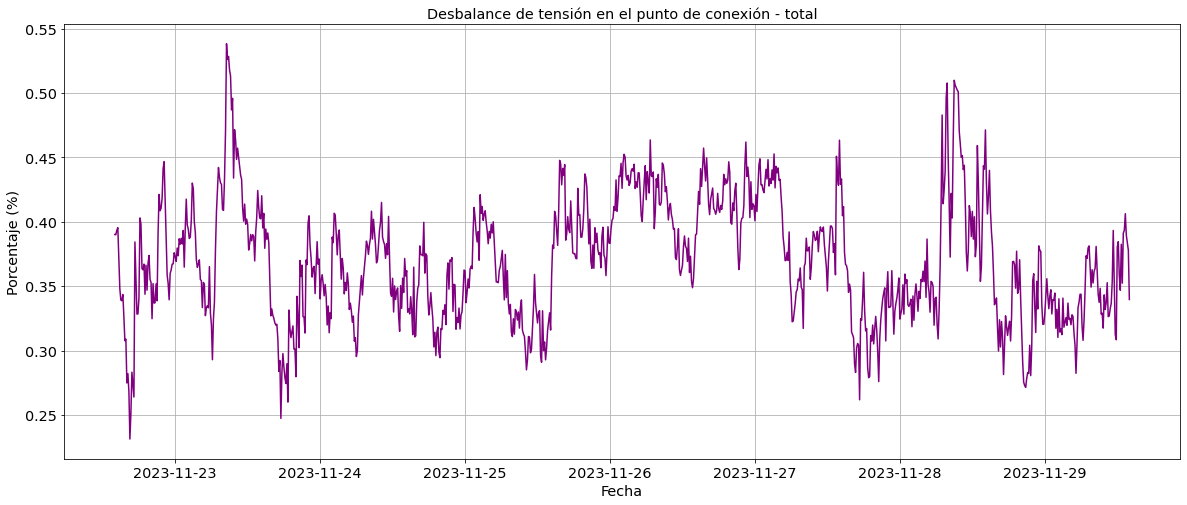

In [39]:
plt.figure(figsize=(20,8))
x1= unb['Fecha']
vunb= unb['%unb-v']
plt.plot(x1, vunb, color='purple')

plt.title('Desbalance de tensión en el punto de conexión - total')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje (%)')
plt.grid()
plt.show()

In [15]:
vunb.describe(percentiles=[0.05, 0.95, 0.99])

count    1009.000000
mean        0.370235
std         0.047175
min         0.231320
5%          0.299852
50%         0.368132
95%         0.443987
99%         0.500608
max         0.538332
Name: %unb-v, dtype: float64

## 3.7.1 Desbalance de corriente

## Evaluacion de desbalance (10 min)

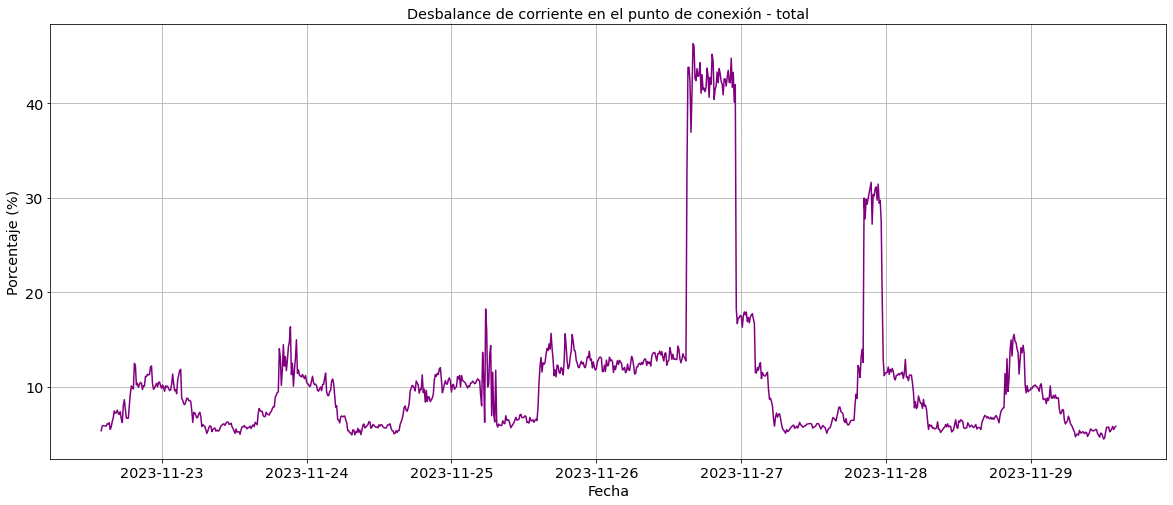

In [6]:
plt.figure(figsize=(20,8))
x1= unb['Fecha']
iunb= unb['%unb-i']
plt.plot(x1, iunb, color='purple')

plt.title('Desbalance de corriente en el punto de conexión - total')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje (%)')
plt.grid()
plt.show()

In [17]:
iunb.describe(percentiles=[0.05, 0.95, 0.99])

count    1009.000000
mean       10.936845
std         8.215541
min         4.464718
5%          5.304442
50%         9.123966
95%        31.333188
99%        43.651315
max        46.312307
Name: %unb-i, dtype: float64

In [15]:
#plt.figure(figsize=(20,8))
#x1= i1['Fecha']
#ia= i1['IA']
#ib= i1['IB']
#ic= i1['IC']

#plt.plot(x1, ia, color ='black', label='Fase A')
#plt.plot(x1, ib, color = 'firebrick', label='Fase B')
#plt.plot(x1, ic, color = 'blue', label= 'Fase C')


#plt.title('Tendencia de corrientes por fase en media tension')
#plt.xlabel('Fecha')
#plt.ylabel('Amperes RMS')
#plt.grid()
#plt.legend( shadow=True )
#plt.show()

## 3.7.2 Distorsión armónica

## 1. Evaluación de TDD

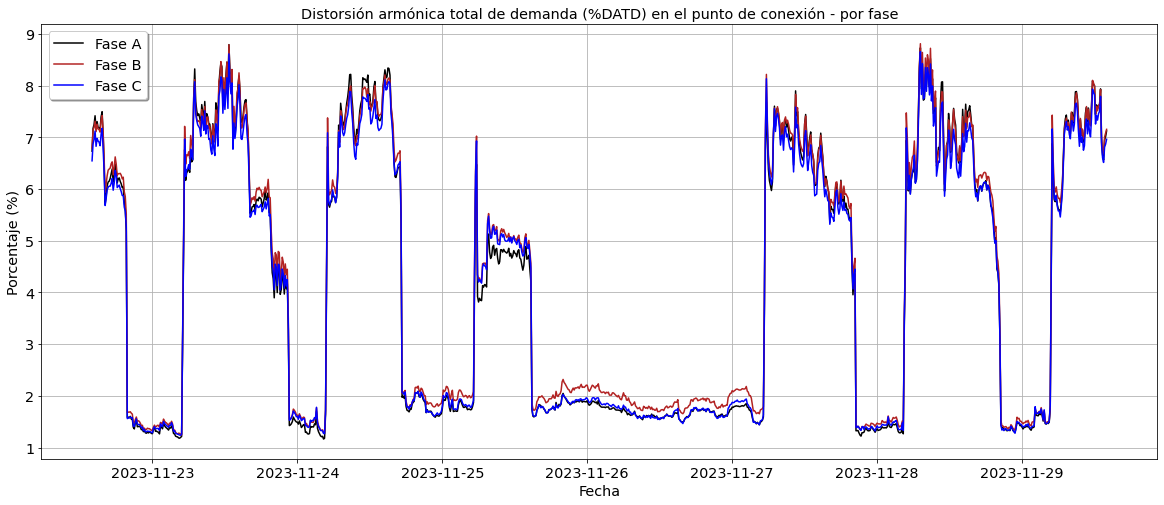

In [4]:
plt.figure(figsize=(20,8))
x1= harm['Fecha']
adatd= harm['A-%DATD']
bdatd= harm['B-%DATD']
cdatd= harm['C-%DATD']

plt.plot(x1, adatd, color ='black', label='Fase A')
plt.plot(x1, bdatd, color = 'firebrick', label='Fase B')
plt.plot(x1, cdatd, color = 'blue', label= 'Fase C')


plt.title('Distorsión armónica total de demanda (%DATD) en el punto de conexión - por fase')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje (%)')
plt.grid()
plt.legend( shadow=True )
plt.show()

## FASE A

In [6]:
adatd.value_counts(bins=[0,12,20], normalize=True).mul(100).round(1).astype(str) + '%'

(-0.001, 12.0]    100.0%
(12.0, 20.0]        0.0%
Name: A-%DATD, dtype: object

In [13]:
adatd.describe(percentiles=[0.05, 0.95, 0.99])

count    1009.000000
mean        4.092451
std         2.588358
min         1.166253
5%          1.325716
50%         3.954674
95%         7.916412
99%         8.322334
max         8.790321
Name: A-%DATD, dtype: float64

## FASE B

In [8]:

bdatd.value_counts(bins=[0,12,20], normalize=True).mul(100).round(1).astype(str) + '%'

(-0.001, 12.0]    100.0%
(12.0, 20.0]        0.0%
Name: B-%DATD, dtype: object

In [11]:
bdatd.describe(percentiles=[0.05, 0.95, 0.99])

count    1009.000000
mean        4.230002
std         2.537950
min         1.244984
5%          1.411698
50%         4.300629
95%         7.886418
99%         8.317426
max         8.808350
Name: B-%DATD, dtype: float64

## FASE C

In [9]:

cdatd.value_counts(bins=[0,12,20], normalize=True).mul(100).round(1).astype(str) + '%'

(-0.001, 12.0]    100.0%
(12.0, 20.0]        0.0%
Name: C-%DATD, dtype: object

In [13]:
cdatd.describe(percentiles=[0.05, 0.95, 0.99])

count    1009.000000
mean        4.061911
std         2.495595
min         1.239372
5%          1.366539
50%         4.154315
95%         7.678451
99%         8.128677
max         8.654282
Name: C-%DATD, dtype: float64

## 2. Evaluación de componentes armónicas individuales

## Nota: Las armonicas ya se encuentran en % de IL de acuerdo a lo solicitado por el código de red.

In [31]:
ih=harm.describe(percentiles=[ 0.95, 0.99])
pd.set_option('display.max_columns', None)
ih

,A-2,B-2,C-2,A-3,B-3,C-3,A-4,B-4,C-4,A-5,B-5,C-5,A-6,B-6,C-6,A-7,B-7,C-7,A-8,B-8,C-8,A-9,B-9,C-9,A-10,B-10,C-10,A-11,B-11,C-11,A-12,B-12,C-12,A-13,B-13,C-13,A-14,B-14,C-14,A-15,B-15,C-15,A-16,B-16,C-16,A-17,B-17,C-17,A-18,B-18,C-18,A-19,B-19,C-19,A-20,B-20,C-20,A-21,B-21,C-21,A-22,B-22,C-22,A-23,B-23,C-23,A-24,B-24,C-24,A-25,B-25,C-25,A-26,B-26,C-26,A-27,B-27,C-27,A-28,B-28,C-28,A-29,B-29,C-29,A-30,B-30,C-30,A-31,B-31,C-31,A-32,B-32,C-32,A-33,B-33,C-33,A-34,B-34,C-34,A-35,B-35,C-35,A-36,B-36,C-36,A-37,B-37,C-37,A-38,B-38,C-38,A-39,B-39,C-39,A-40,B-40,C-40,A-41,B-41,C-41,A-42,B-42,C-42,A-43,B-43,C-43,A-44,B-44,C-44,A-45,B-45,C-45,A-46,B-46,C-46,A-47,B-47,C-47,A-48,B-48,C-48,A-49,B-49,C-49,A-50,B-50,C-50,A-%DATD,B-%DATD,C-%DATD
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,0.093735,0.101024,0.082972,0.321905,0.362700,0.393596,0.037110,0.041350,0.036348,3.382763,3.417343,3.299428,0.002846,0.002474,0.002868,1.704875,1.599382,1.604042,0.021624,0.020493,0.022232,0.093361,0.041395,0.089199,0.028212,0.022800,0.026852,0.988448,1.051636,0.949334,0.003063,0.007430,0.008957,0.626904,0.575175,0.457046,0.016191,0.019588,0.016169,0.062635,0.044270,0.073993,0.012800,0.016039,0.013304,0.325200,0.550995,0.499887,0.001696,0.001507,0.002158,0.706974,1.197829,1.086730,0.010399,0.011138,0.013044,0.049381,0.023575,0.034910,0.009280,0.008806,0.009057,0.118451,0.221149,0.248786,0.000855,0.000656,0.000781,0.140723,0.080927,0.099980,0.006620,0.005412,0.005830,0.012486,0.006688,0.012030,0.005745,0.004797,0.004476,0.043806,0.035499,0.050175,0.000676,0.000501,0.000995,0.031224,0.015463,0.023108,0.005075,0.004110,0.003671,0.003141,0.004588,0.002477,0.005221,0.004237,0.003600,0.010334,0.018210,0.018216,0.000692,0.000538,0.001069,0.014432,0.009652,0.009992,0.005132,0.004242,0.003629,0.001543,0.002302,0.001484,0.005135,0.004173,0.003532,0.009647,0.009146,0.009208,0.000655,0.000492,0.001008,0.009199,0.007004,0.007978,0.005086,0.004138,0.003456,0.001071,0.000896,0.001171,0.005012,0.004114,0.003416,0.006306,0.006608,0.006858,0.000699,0.000527,0.001087,0.007197,0.006230,0.006629,0.005002,0.004095,0.003394,4.092451,4.230002,4.061911
std,0.028066,0.043211,0.037910,0.118086,0.208484,0.140029,0.021209,0.026879,0.023017,2.215381,2.001587,

## 3.7.3 Fluctuaciones de tension

## Flicker PST

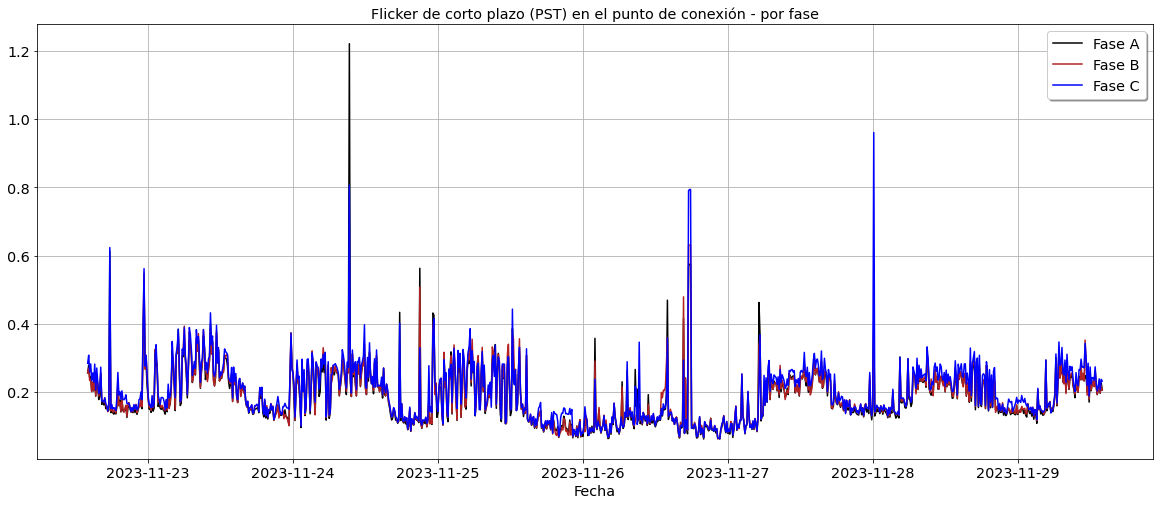

In [33]:
plt.figure(figsize=(20,8))
x1= pst1['Fecha']
psta= pst1['A-PST']
pstb= pst1['B-PST']
pstc= pst1['C-PST']

plt.plot(x1, psta, color ='black', label='Fase A')
plt.plot(x1, pstb, color = 'firebrick', label='Fase B')
plt.plot(x1, pstc, color = 'blue', label= 'Fase C')


plt.title('Flicker de corto plazo (PST) en el punto de conexión - por fase')
plt.xlabel('Fecha')
#plt.ylabel('P.U.')
plt.grid()
plt.legend( shadow=True )
plt.show()

In [11]:
pstt=pst1.describe(percentiles=[ 0.95, 0.99])
pd.set_option('display.max_columns', None)
pstt

,A-PST,B-PST,C-PST
count,1009.000000,1009.000000,1009.000000
mean,0.186128,0.188799,0.198914
std,0.084077,0.077188,0.088356
min,0.062745,0.062983,0.063306
50%,0.164391,0.169499,0.178263
95%,0.310544,0.316242,0.324925
99%,0.431479,0.388211,0.401848
max,1.221033,0.631087,0.960688


## Flicker PLT

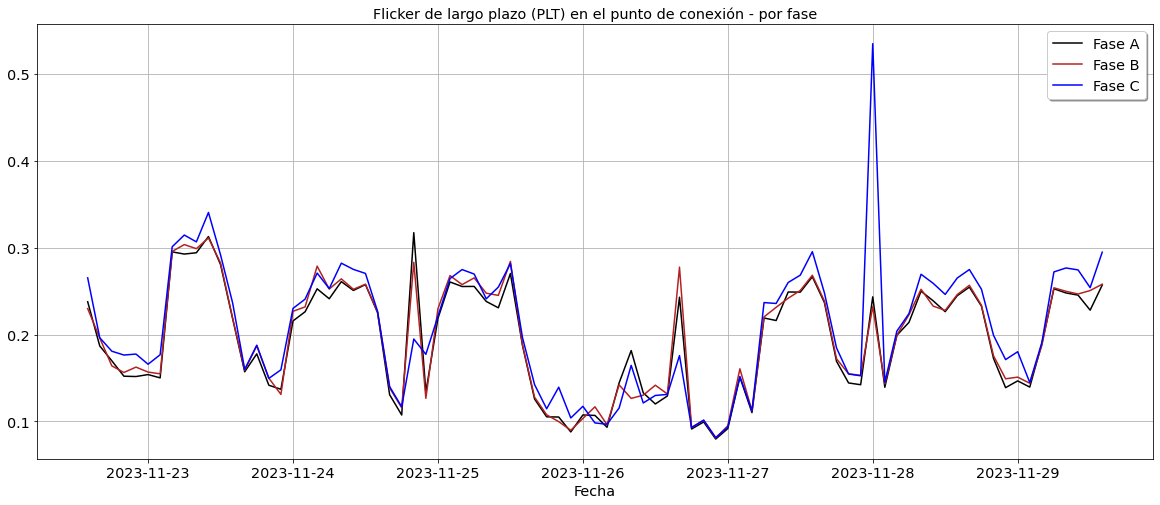

In [32]:
plt.figure(figsize=(20,8))
x1= plt1['Fecha']
plta= plt1['A-PLT']
pltb= plt1['B-PLT']
pltc= plt1['C-PLT']

plt.plot(x1, plta, color ='black', label='Fase A')
plt.plot(x1, pltb, color = 'firebrick', label='Fase B')
plt.plot(x1, pltc, color = 'blue', label= 'Fase C')


plt.title('Flicker de largo plazo (PLT) en el punto de conexión - por fase')
plt.xlabel('Fecha')
#plt.ylabel('PLT')
plt.grid()
plt.legend( shadow=True )
plt.show()

In [13]:
pltt=plt1.describe(percentiles=[ 0.95, 0.99])
pd.set_option('display.max_columns', None)
pltt

,A-PLT,B-PLT,C-PLT
count,85.000000,85.000000,85.000000
mean,0.194239,0.197423,0.208555
std,0.062834,0.063451,0.074742
min,0.079724,0.080956,0.081368
50%,0.214115,0.218995,0.199186
95%,0.290361,0.284133,0.300083
99%,0.313688,0.304935,0.371804
max,0.317424,0.311410,0.535090
